# Corpus Descriptive statistics

In [38]:
# load the JSON texts and create a dataframe
import pandas as pd
import json
import os

json_folder = "Corpus_JSON/"
data = []
for filename in os.listdir(json_folder):
    with open(json_folder+filename, 'r') as f:
        json_data = json.load(f)
        data.append(json_data)
df = pd.DataFrame(data)

## Now let's visualise the data:

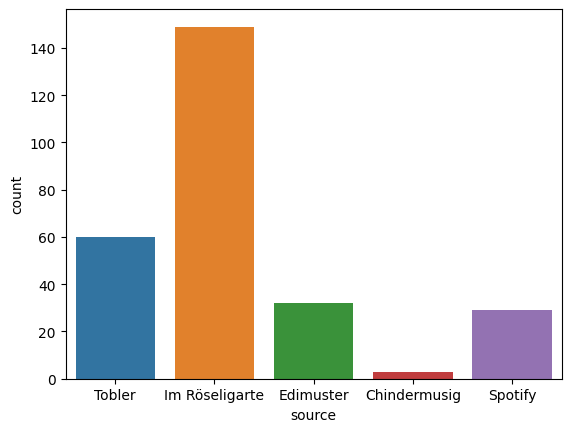

source
Im Röseligarte    149
Tobler             60
Edimuster          32
Spotify            29
Chindermusig        3
Name: count, dtype: int64


In [58]:
# collection source
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data=df, x='source')
plt.show()
print(df['source'].value_counts())


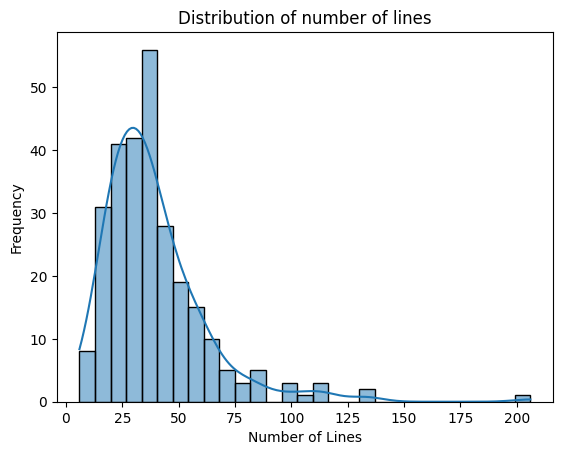

In [52]:
sns.histplot(data=df, x='num_lines', kde=True)
plt.title('Distribution of number of lines')
plt.xlabel('Number of Lines')
plt.ylabel('Frequency')
plt.show()

In [1]:
custom_order = ["couplets", "tercets", "quatrains", "irregular", "other"]
df['stanza_pattern'] = pd.Categorical(df['stanza_pattern'], categories=custom_order, ordered=True)
sns.countplot(data=df, x='stanza_pattern')
plt.title('Distribution of Stanza Patterns')
plt.xlabel('Stanza Pattern')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # To rotate the x-axis labels if needed
plt.show()

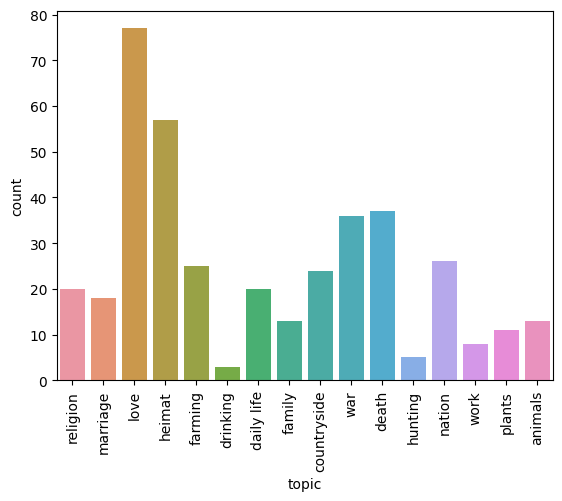

In [88]:
# topic
df_topics = df.explode('topic')
ax = sns.countplot(data=df_topics, x='topic')
# Move the legend outside the plot
plt.xticks(rotation=90)


plt.show()




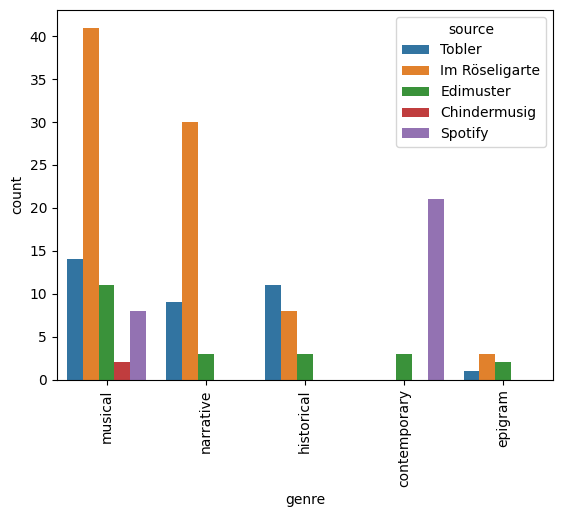

In [48]:
filtered_df = df[~df['genre'].isin(['children', 'Christmas'])]

sns.countplot(data=filtered_df, x='genre', hue="source")
plt.xticks(rotation=90)
plt.show()


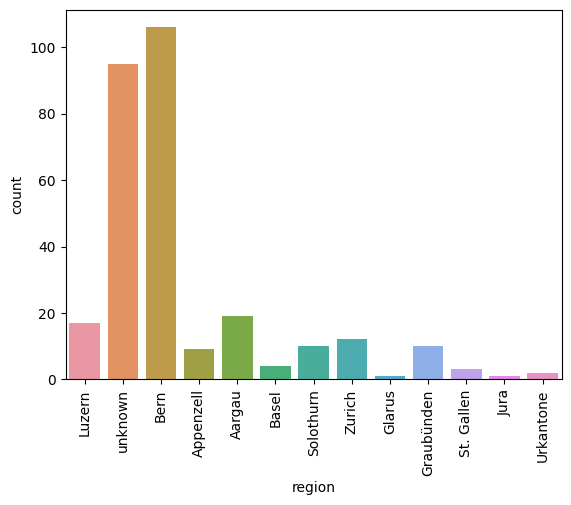

region
Bern          106
unknown        95
Aargau         19
Luzern         17
Zurich         12
Solothurn      10
Graubünden     10
Appenzell       9
Basel           4
St. Gallen      3
Urkantone       2
Glarus          1
Jura            1
Name: count, dtype: int64


In [46]:
df_cantons = df.explode('region')
ax = sns.countplot(data=df_cantons, x='region')
plt.xticks(rotation=90)


plt.show()
print(df_cantons['region'].value_counts())


Chi-square value: 15.14780277085928
P-value: 9.941393788554671e-05
There is a significant association between 'genre' and 'stanza_pattern'.


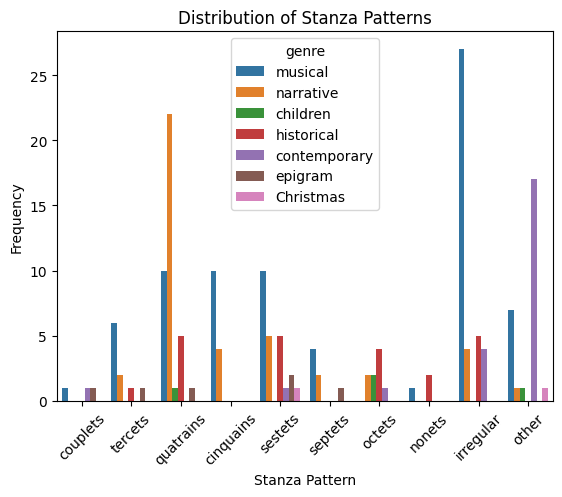

In [16]:
import os, json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
other_json_folder = "JSON_tests/"
newdata = []
for filename in os.listdir(other_json_folder):
    with open(other_json_folder+filename, 'r') as f:
        json_data = json.load(f)
        newdata.append(json_data)
newdf = pd.DataFrame(newdata)
custom_order = ["couplets", "tercets", "quatrains", "cinquains","sestets","septets","octets","nonets","irregular", "other"]
newdf['stanza_pattern'] = pd.Categorical(newdf['stanza_pattern'], categories=custom_order, ordered=True)

contingency_table = pd.crosstab(newdf['genre'] == 'narrative', newdf['stanza_pattern'] == 'quatrains')

chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square value: {chi2}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("There is a significant association between 'genre' and 'stanza_pattern'.")
else:
    print("There is no significant association between 'genre' and 'stanza_pattern'.")


sns.countplot(data=newdf, x='stanza_pattern', hue='genre')
plt.title('Distribution of Stanza Patterns')
plt.xlabel('Stanza Pattern')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # To rotate the x-axis labels if needed
plt.show()